In [26]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import requests
from scipy.stats import linregress

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [12]:
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bengkulu
Processing Record 2 of Set 1 | havelock
Processing Record 3 of Set 1 | inirida
Processing Record 4 of Set 1 | siavonga
Processing Record 5 of Set 1 | shitanjing
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | ambilobe
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | ailigandi
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | prince rupert
Processing Record 14 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | verkhnyaya inta
Processing Record 17 of Set 1 | ostrovnoy
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | sobolevo
Processing Record 20 of Set 1 | ixtapa
Processing Record 21 of Set 1 | tulun
Processing Record 

Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | deputatskiy
Processing Record 44 of Set 4 | warrenton
Processing Record 45 of Set 4 | prachuap khiri khan
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | khatanga
Processing Record 48 of Set 4 | nizhneangarsk
Processing Record 49 of Set 4 | barahona
Processing Record 50 of Set 4 | port alfred
Processing Record 1 of Set 5 | dukat
Processing Record 2 of Set 5 | raudeberg
Processing Record 3 of Set 5 | miri
Processing Record 4 of Set 5 | lac du bonnet
Processing Record 5 of Set 5 | christchurch
Processing Record 6 of Set 5 | verkhniy fiagdon
Processing Record 7 of Set 5 | birao
Processing Record 8 of Set 5 | narsaq
Processing Record 9 of Set 5 | shingu
Processing Record 10 of Set 5 | los andes
Processing Record 11 of Set 5 | opuwo
Processing Record 12 of Set 5 | benghazi
Processing Record 13 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 14 of Set 5 | gazojak

Processing Record 29 of Set 8 | whitehorse
Processing Record 30 of Set 8 | necochea
Processing Record 31 of Set 8 | kilindoni
Processing Record 32 of Set 8 | liverpool
Processing Record 33 of Set 8 | bam
Processing Record 34 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 35 of Set 8 | dali
Processing Record 36 of Set 8 | harper
Processing Record 37 of Set 8 | hihifo
City not found. Skipping...
Processing Record 38 of Set 8 | athabasca
Processing Record 39 of Set 8 | pokhara
Processing Record 40 of Set 8 | fruitvale
Processing Record 41 of Set 8 | bure
Processing Record 42 of Set 8 | laguna
Processing Record 43 of Set 8 | medea
Processing Record 44 of Set 8 | richards bay
Processing Record 45 of Set 8 | grand gaube
Processing Record 46 of Set 8 | quthing
Processing Record 47 of Set 8 | kodinsk
Processing Record 48 of Set 8 | tiarei
Processing Record 49 of Set 8 | urengoy
Processing Record 50 of Set 8 | juneau
Processing Record 1 of Set 9 | caravelas
Processing Re

Processing Record 18 of Set 12 | esfahan
Processing Record 19 of Set 12 | puerto cabezas
Processing Record 20 of Set 12 | presidente medici
Processing Record 21 of Set 12 | alice springs
Processing Record 22 of Set 12 | wahran
City not found. Skipping...
Processing Record 23 of Set 12 | aflu
City not found. Skipping...
Processing Record 24 of Set 12 | omsukchan
Processing Record 25 of Set 12 | merritt island
Processing Record 26 of Set 12 | belle fourche
Processing Record 27 of Set 12 | chinchani
Processing Record 28 of Set 12 | san ramon
Processing Record 29 of Set 12 | pemangkat
Processing Record 30 of Set 12 | pangnirtung
Processing Record 31 of Set 12 | comodoro rivadavia
Processing Record 32 of Set 12 | sturgeon falls
Processing Record 33 of Set 12 | la sarre
Processing Record 34 of Set 12 | ornskoldsvik
Processing Record 35 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 36 of Set 12 | bushehr
Processing Record 37 of Set 12 | oranjemund
Processing Record 38 of

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bengkulu,-3.8004,102.2655,76.60,79,20,5.50,ID,2022-03-28 01:08:15
1,Havelock,34.8791,-76.9013,55.92,44,0,6.91,US,2022-03-28 01:08:16
2,Inirida,3.8653,-67.9239,74.05,96,90,3.31,CO,2022-03-28 01:08:16
3,Siavonga,-16.5382,28.7088,73.31,88,95,4.43,ZM,2022-03-28 01:08:16
4,Shitanjing,39.2342,106.3439,42.93,33,12,10.11,CN,2022-03-28 01:08:17
5,Albany,42.6001,-73.9662,27.36,66,100,3.00,US,2022-03-28 01:06:51
6,Ambilobe,-13.2000,49.0500,73.00,96,97,2.64,MG,2022-03-28 01:08:18
7,Mar Del Plata,-38.0023,-57.5575,60.87,77,0,3.00,AR,2022-03-28 01:08:18
8,Kapaa,22.0752,-159.3190,79.20,71,40,11.50,US,2022-03-28 01:08:19
9,Kodiak,57.7900,-152.4072,33.31,100,100,32.21,US,2022-03-28 01:08:19


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bengkulu,ID,2022-03-28 01:08:15,-3.8004,102.2655,76.60,79,20,5.50
1,Havelock,US,2022-03-28 01:08:16,34.8791,-76.9013,55.92,44,0,6.91
2,Inirida,CO,2022-03-28 01:08:16,3.8653,-67.9239,74.05,96,90,3.31
3,Siavonga,ZM,2022-03-28 01:08:16,-16.5382,28.7088,73.31,88,95,4.43
4,Shitanjing,CN,2022-03-28 01:08:17,39.2342,106.3439,42.93,33,12,10.11
5,Albany,US,2022-03-28 01:06:51,42.6001,-73.9662,27.36,66,100,3.00
6,Ambilobe,MG,2022-03-28 01:08:18,-13.2000,49.0500,73.00,96,97,2.64
7,Mar Del Plata,AR,2022-03-28 01:08:18,-38.0023,-57.5575,60.87,77,0,3.00
8,Kapaa,US,2022-03-28 01:08:19,22.0752,-159.3190,79.20,71,40,11.50
9,Kodiak,US,2022-03-28 01:08:19,57.7900,-152.4072,33.31,100,100,32.21


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

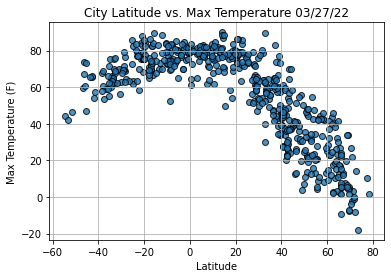

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

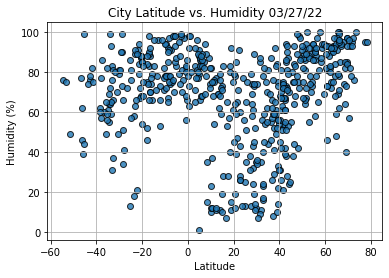

In [21]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

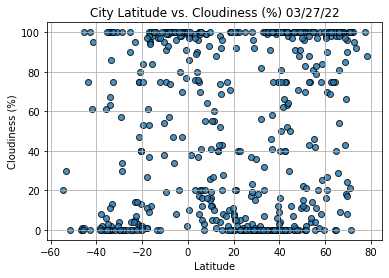

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

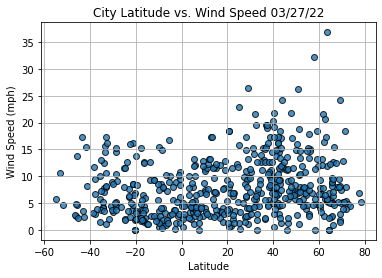

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

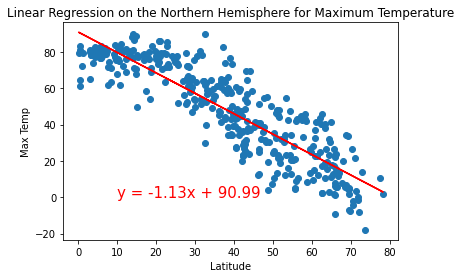

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,0))

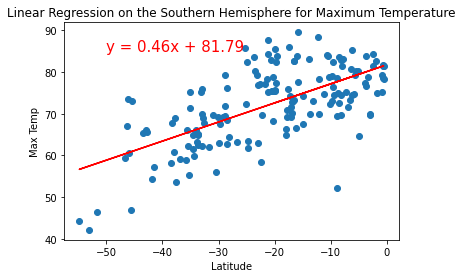

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,85))

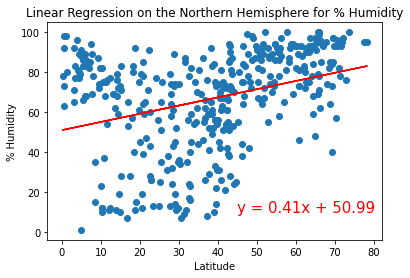

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,10))


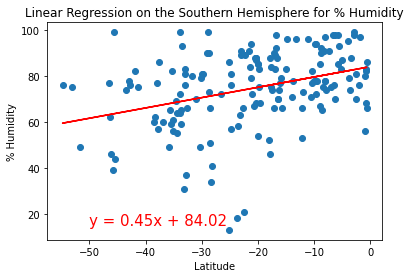

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

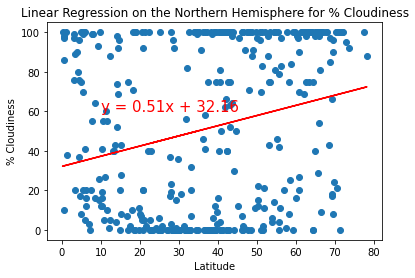

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,60))

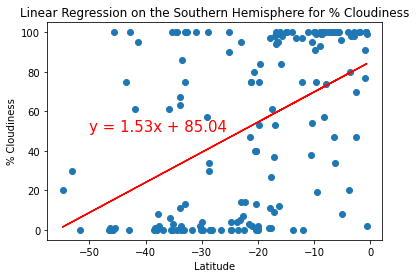

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,50))


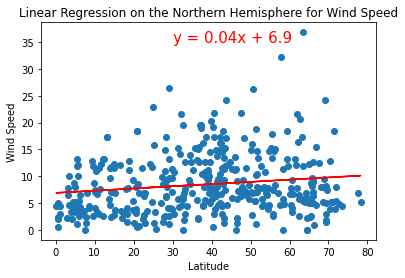

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(30,35))

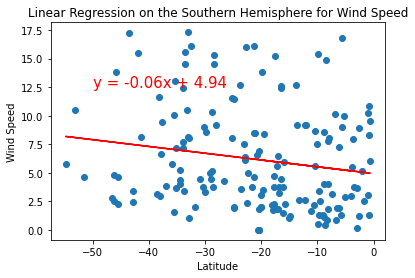

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,12.5))